# Cab and Taxi EDA Investment Proposal 

### 1. Business Undarstanding
OBJECTIVE: A private corporation named XYZ is looking to make investments in the quickly expanding taxi and cab sector. They are carrying out a thorough exploratory data analysis and data mining of significant American cities in order to make well-informed investment selections. The goal is to discover trends that can guide strategic investment decisions and offer actionable insights.





### Project Plan: 
Investigate the data sources to deliver precise explanatory data analysis that will assist decision-makers in gaining understanding of the cab and taxi industry and in choosing the best investment option.


Success criteria include providing a visual presentation to the executive team and stakeholders of XYZ to aid in decision-making.


## 2. Data Understanding
### 2.1 Data Exploration
IMPORTING REQUIRED LIBRARIES AND DATA

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

Checking all the 4 files out

In [6]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [9]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [13]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [15]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [33]:
transaction.Payment_Mode.value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [38]:
cards = transaction.Payment_Mode.value_counts()[0]/len(transaction.Payment_Mode)*100
cash = 100 - cards
print(f'Percentage of people payed by Card: {round(cards)} %')
print(f'Percentage of people payed by Cash: {round(cash)} %')

Percentage of people payed by Card: 60 %
Percentage of people payed by Cash: 40 %


In [42]:
print(f'Percentage of Male customers: {round(customer.Gender.value_counts()[0]/len(customer)*100)} %')
print(f'Percentage of Female customer: {round(customer.Gender.value_counts()[1]/len(customer)*100)} %')

Percentage of Male customers: 54 %
Percentage of Female customer: 46 %


From the above data we were able to understand that
1. Cost of each trip lies between $19 to $691.2 with average spendings of $286.
2. Distance travelled for each trip lies between 2Kms to 48Kms with average distance of $12Kms.
3. Age of the people using cabs lies between 18 to 65 with average age of 35.
4. Income of the customers using cab lies between $2000 to $35000 averaging $15015.
5. 60% of people prefer to pay by card
6. We have more male customer but the difference is not huge.

## 3. Data Merging
 
 Joining Master Dataset with all the other datasets

In [205]:
# Inner join of transaction_id and cab_data

transaction_cab = pd.merge(transaction, cab_data, on = 'Transaction ID', how='inner')
transaction_cab.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [206]:
# Left join in customer_id and previous inner join
transaction_cab_customer = pd.merge(transaction_cab, customer, on = 'Customer ID', how = 'left')

# Left join and creating master dataset
df_merge = pd.merge(transaction_cab_customer, city, on = 'City', how = 'left')

df_merge.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,"814,885","24,701"
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,"814,885","24,701"
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,"814,885","24,701"
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,"814,885","24,701"
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,"814,885","24,701"


In [207]:
df_merge.describe()

,Transaction ID,Customer ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,42964.067998,22.567254,423.443311,286.190113,35.336705,15048.822937
std,1.268058e+05,21012.412463,307.467197,12.233526,274.378911,157.993661,12.594234,7969.409482
min,1.000001e+07,1.000000,42371.000000,1.900000,15.600000,19.000000,18.000000,2000.000000
25%,1.011081e+07,2705.000000,42697.000000,12.000000,206.437500,151.200000,25.000000,8424.000000
50%,1.022104e+07,7459.000000,42988.000000,22.440000,386.360000,282.480000,33.000000,14685.000000
75%,1.033094e+07,36078.000000,43232.000000,32.960000,583.660000,413.683200,42.000000,21035.000000
max,1.044011e+07,60000.000000,43465.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000


In [208]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


## Feature Transformation

Correcting the sequence and format of all the features

In [209]:
# Replacing "," from Population and Users
df_merge['Population'] = df_merge['Population'].str.replace(',', '')
df_merge['Users'] = df_merge['Users'].str.replace(',', '')

# change data type of a column
df_merge['Population'] = df_merge['Population'].astype('int64')
df_merge['Users'] = df_merge['Users'].astype('int64')
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 41.1+ MB


In [210]:
df = df_merge.copy()

In [211]:
# Feature Not Important
df.drop(['Transaction ID', 'Customer ID'], axis = 1, inplace= True)
df

,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users
0,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,814885,24701
1,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,814885,24701
2,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,Male,53,11242,814885,24701
3,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,Male,23,23327,814885,24701
4,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,Male,33,8536,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,Cash,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,Male,24,15651,418859,127001
359388,Cash,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,Male,32,6528,418859,127001
359389,Cash,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,Male,56,7966,418859,127001
359390,Card,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,Male,32,6423,418859,127001


In [212]:
# convert the Excel serial date format to datetime format
df['Date'] = pd.to_datetime(df['Date of Travel'], unit='d', origin='1900-01-01')

# extract day, month, and year from the datetime format
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# create a binary variable indicating whether the date falls on a weekend or not
df['Is_Weekend'] = (df['Date'].dt.dayofweek >= 5).astype(int)
# print the result
df.drop('Date of Travel', axis=1, inplace=True)
df.head()

,Payment_Mode,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Population,Users,Date,Day,Month,Year,Is_Weekend
0,Card,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,814885,24701,2016-01-10,10,1,2016,1
1,Card,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,814885,24701,2016-01-08,8,1,2016,0
2,Cash,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,814885,24701,2016-01-04,4,1,2016,0
3,Cash,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,814885,24701,2016-01-09,9,1,2016,1
4,Card,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,814885,24701,2016-01-05,5,1,2016,0


In [213]:
df['Profit/Km'] = round((df['Price Charged']-df['Cost of Trip'])/df['KM Travelled'])
df.drop(['Cost of Trip','Price Charged', 'KM Travelled'], axis=1, inplace=True)
df.head()

,Payment_Mode,Company,City,Gender,Age,Income (USD/Month),Population,Users,Date,Day,Month,Year,Is_Weekend,Profit/Km
0,Card,Pink Cab,ATLANTA GA,Male,28,10813,814885,24701,2016-01-10,10,1,2016,1,2.0
1,Card,Pink Cab,ATLANTA GA,Male,27,9237,814885,24701,2016-01-08,8,1,2016,0,1.0
2,Cash,Pink Cab,ATLANTA GA,Male,53,11242,814885,24701,2016-01-04,4,1,2016,0,3.0
3,Cash,Pink Cab,ATLANTA GA,Male,23,23327,814885,24701,2016-01-09,9,1,2016,1,1.0
4,Card,Pink Cab,ATLANTA GA,Male,33,8536,814885,24701,2016-01-05,5,1,2016,0,2.0


In [218]:
most_profitable_city = df.groupby('City')['Profit/Km'].mean()
most_profitable_city

City
ATLANTA GA         5.009792
AUSTIN TX          4.826185
BOSTON MA          2.638859
CHICAGO IL         2.639647
DALLAS TX          7.119567
DENVER CO          4.621961
LOS ANGELES CA     4.049279
MIAMI FL           5.167338
NASHVILLE TN       2.178073
NEW YORK NY       12.439165
ORANGE COUNTY      5.140131
PHOENIX AZ         4.180717
PITTSBURGH PA      2.775324
SACRAMENTO CA      2.159273
SAN DIEGO CA       3.436695
SEATTLE WA         3.343504
SILICON VALLEY     6.753140
TUCSON AZ          3.200932
WASHINGTON DC      3.522144
Name: Profit/Km, dtype: float64

In [219]:
# Poplution per User
df['Population/User'] = round(df['Population']/df['Users'])
df.drop(['Population','Users'],axis=1,inplace=True)
df.head()

,Payment_Mode,Company,City,Gender,Age,Income (USD/Month),Date,Day,Month,Year,Is_Weekend,Profit/Km,Population/User
0,Card,Pink Cab,ATLANTA GA,Male,28,10813,2016-01-10,10,1,2016,1,2.0,33.0
1,Card,Pink Cab,ATLANTA GA,Male,27,9237,2016-01-08,8,1,2016,0,1.0,33.0
2,Cash,Pink Cab,ATLANTA GA,Male,53,11242,2016-01-04,4,1,2016,0,3.0,33.0
3,Cash,Pink Cab,ATLANTA GA,Male,23,23327,2016-01-09,9,1,2016,1,1.0,33.0
4,Card,Pink Cab,ATLANTA GA,Male,33,8536,2016-01-05,5,1,2016,0,2.0,33.0


In [220]:
df['Income (USD/Month)'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

In [221]:
# define the population bins and labels
bins = [0, 12500, 25500, float('inf')]
labels = ['Low Income', 'Medium Income', 'High Income']

# categorize the population based on the bins and labels
df['Income (USD/Month)'] = pd.cut(df['Income (USD/Month)'], bins=bins, labels=labels)

# print the categorized df dataframe
df.head()

,Payment_Mode,Company,City,Gender,Age,Income (USD/Month),Date,Day,Month,Year,Is_Weekend,Profit/Km,Population/User
0,Card,Pink Cab,ATLANTA GA,Male,28,Low Income,2016-01-10,10,1,2016,1,2.0,33.0
1,Card,Pink Cab,ATLANTA GA,Male,27,Low Income,2016-01-08,8,1,2016,0,1.0,33.0
2,Cash,Pink Cab,ATLANTA GA,Male,53,Low Income,2016-01-04,4,1,2016,0,3.0,33.0
3,Cash,Pink Cab,ATLANTA GA,Male,23,Medium Income,2016-01-09,9,1,2016,1,1.0,33.0
4,Card,Pink Cab,ATLANTA GA,Male,33,Low Income,2016-01-05,5,1,2016,0,2.0,33.0


## Exploration

Plotting Distributed Histogram

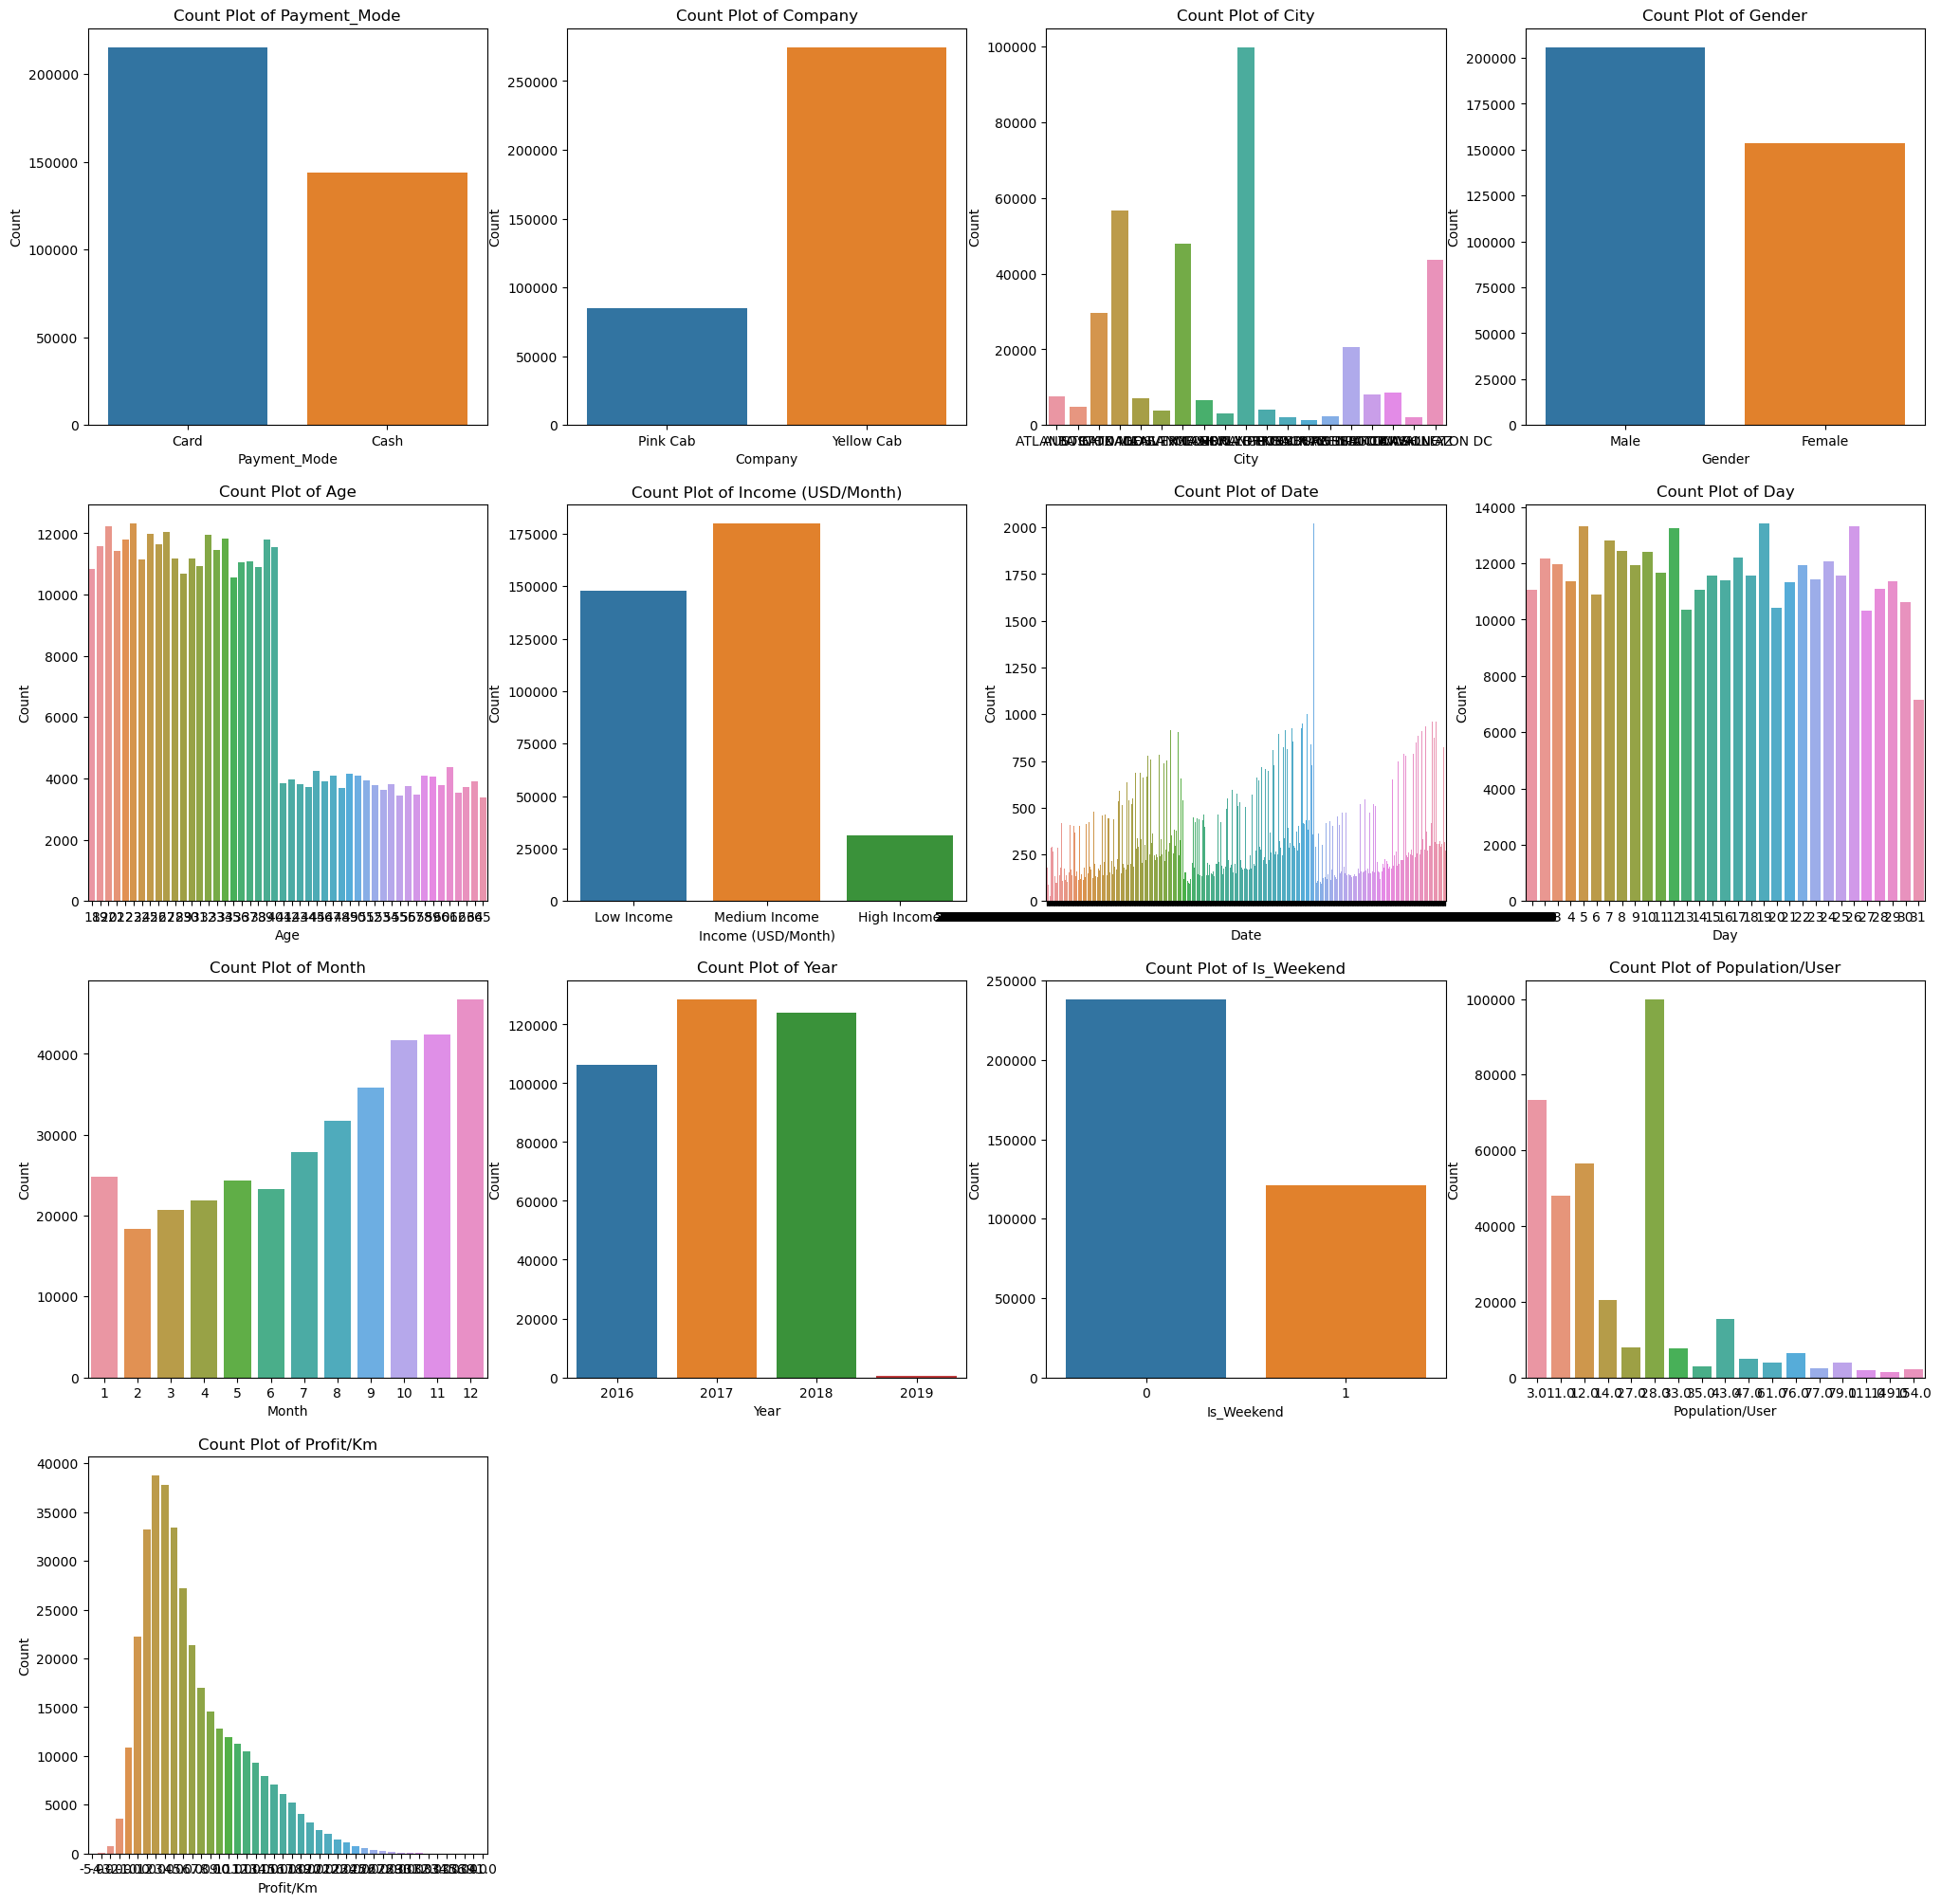

In [149]:
fig = plt.figure(figsize = (25, 25))

    # loop through numerical columns
for i, column in enumerate(df.columns):
    # create histogram
    plt.subplot(4,4, i+1)
    sns.countplot(data=df, x=column)
    plt.title('Count Plot of ' + column)
    plt.xlabel(column)
    plt.ylabel('Count')
plt.show()


### OBSERVATIONS
1. People prefer to pay more by cards.
2. Yellow Taxi is more popular and preferable by customers.
3. New York, Chicago, Los Angeles, and Washington has most number of users of Cabs
4. We have more male customers than females, however; the difference is not a lot
5. Agr 20-40 has the most number of Cab users.
6. High income customer do not prefer cabs probably they have their own cars and drivers.
7. We can also see that during winters more people prefer cabs.
8. More Cabs are booking during weekend.
9. Most Cabs earn $1-5/km

In [178]:
# calculate the correlation matrix
cor = df_corr.corr()

# replace correlation values less than 0.1 with zero
cor = cor.mask(abs(cor) < 0.1, other=0)

# apply a color gradient to the correlation matrix
cor = cor.style.background_gradient(cmap='coolwarm').format('{:.3f}')

# display the correlation matrix
display(cor)

,Payment_Mode,Company,City,Gender,Age,Day,Month,Year,Is_Weekend,Population/User,Profit/Km
Payment_Mode,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Company,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.332
City,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Gender,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Age,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
Day,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
Month,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,-0.123
Year,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.135,0.000,0.000
Is_Weekend,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.135,1.000,0.000,0.000
Population/User,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.190


From the above map we observed.

1. There is a small corelation between Profit/Km and Company
2. And Profit/Km with Month which as proved in the last observation that winters are more profitable for cab companies.

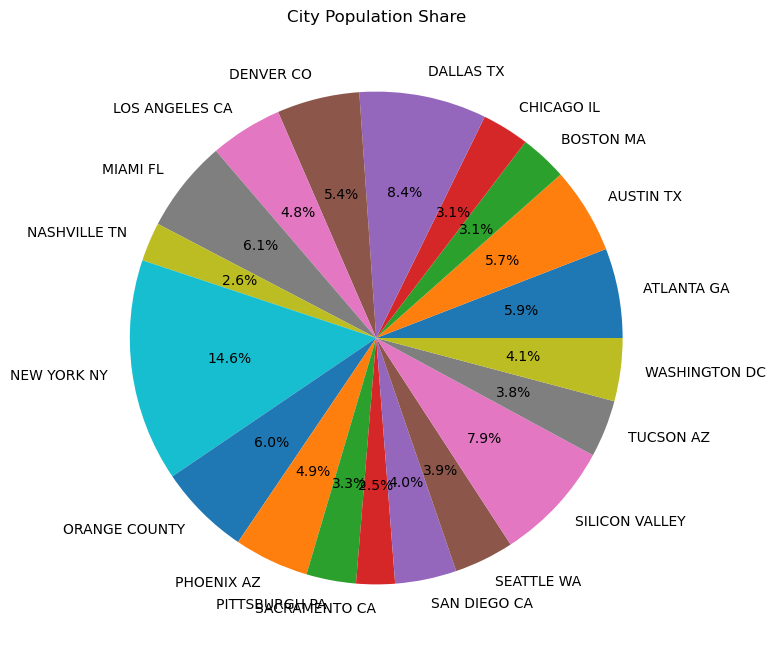

In [223]:
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(most_profitable_city.values, labels=most_profitable_city.index, autopct='%1.1f%%')
plt.title('City Population Share')
plt.show()

## EDA by the Company


Here we can see that most profitable city for the cabs are New York, Dallas and Silicon Valley and least profitable cities are Sacramento, Nashville, Boston and Chicago.

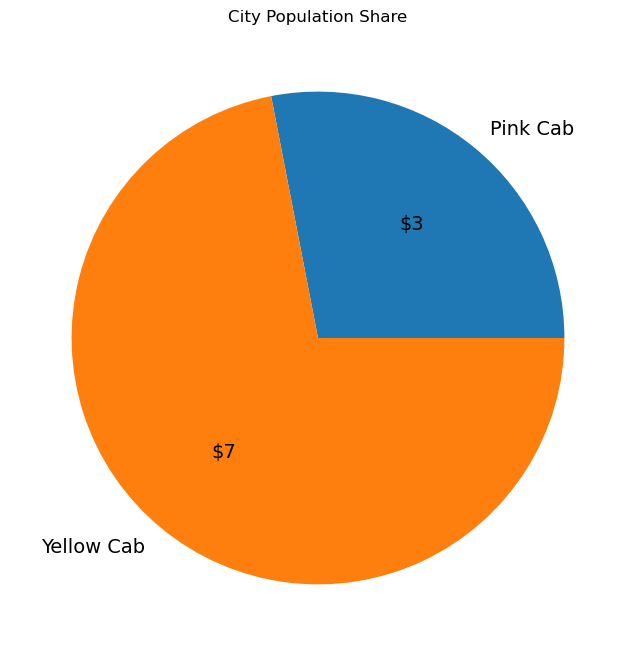

In [229]:
company_profit_km = df.groupby('Company')['Profit/Km'].mean()
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(company_profit_km.values, labels=company_profit_km.index, autopct=lambda x: f"${int(round(x*sum(company_profit_km.values)/100))}", textprops={'fontsize': 14})
plt.title('City Population Share')
plt.show()

On an average we can see that Yellow Cabs is earning $4 more profit as compared to Pink Cabs 

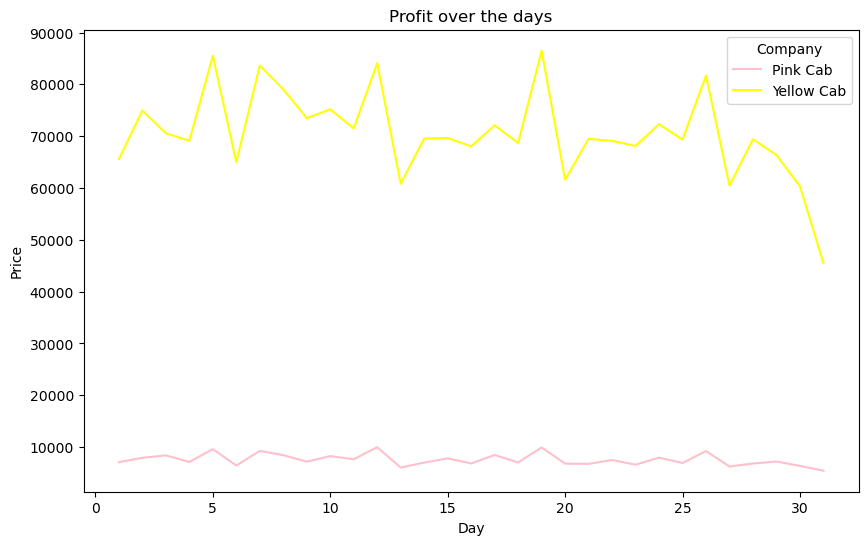

In [235]:
# group the dataframe by day and company and calculate the total profit per km
grouped = df.groupby(['Day', 'Company'])['Profit/Km'].sum()

# reshape the grouped data into a pivot table
pivot_table = grouped.unstack()

# plot the pivot table as a stacked line chart
ax = pivot_table.plot(kind='line', stacked=True, figsize=(10, 6), color=['pink', 'yellow'])

# set the chart title and axis labels
ax.set_title('Profit over the days')
ax.set_xlabel('Day')
ax.set_ylabel('Price')

# show the chart
plt.show()


Over the period of time we can notice that yellow cabs business decreses, reason could be that our majority of users are from Low and Medium Income between 20-40 so due to month end. 

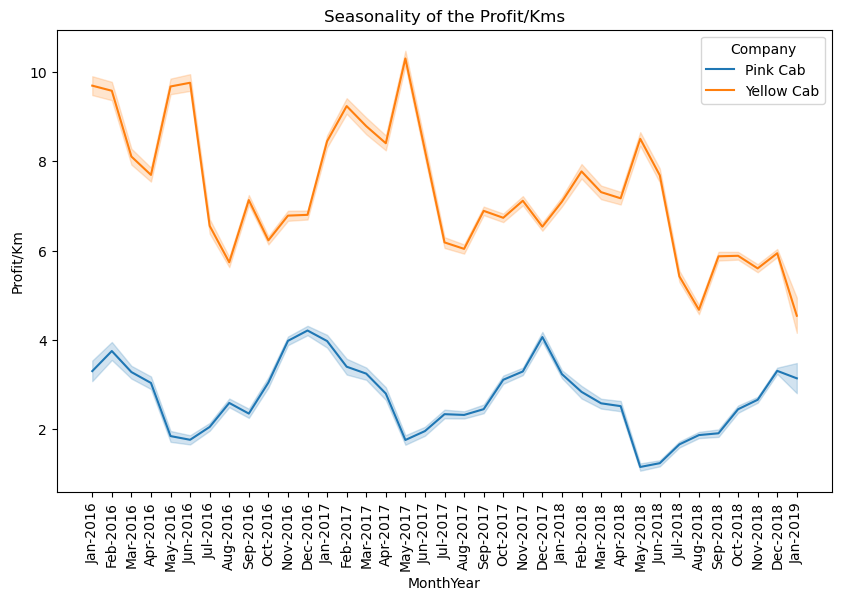

In [237]:
# convert Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract month and year from Date column
df['MonthYear'] = df['Date'].dt.strftime('%b-%Y')

# plot line graph
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='MonthYear', y='Profit/Km', hue='Company')
plt.xticks(rotation=90)
plt.title('Seasonality of the Profit/Kms')

plt.show()

Here, we can see that, despite the fact that the Yellow Cab Company's profit is larger overall, the trend is negative. The Pink Company, in contrast, has more consistent seasonality with the highest profits in November, December, and January.